<a href="https://colab.research.google.com/github/rohi-boop/LR_delivery_Time_prediction_-Rohit-Mahato-.zip/blob/main/LR_Delivery_Time_Prediction_%3CRohit_Mahato%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [295]:
pip install lmdiag

In [296]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [297]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [298]:
data=pd.read_excel(r'/content/drive/MyDrive/porter_data_1.csv.xlsx')
data.head(2)

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1,4,3441,4,557,1239,33,14,21,34.44
1,2,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2,1,1900,1,1400,1400,1,2,2,27.60


In [299]:
data.shape

(175777, 14)

In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  int64         
 11  total_busy_dashers        175777 non-null  int64         
 12  to

In [301]:
data.describe()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
count,175777.000000,175777,175777,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,2015-02-04 19:57:50.009631744,2015-02-04 20:44:02.190406144,35.887949,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,21.843090
min,1.000000,2015-01-21 15:22:03,2015-01-21 16:07:03,0.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000
25%,2.000000,2015-01-29 01:31:19,2015-01-29 02:16:30,18.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,15.360000
50%,2.000000,2015-02-05 02:41:26,2015-02-05 03:34:33,38.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,21.760000
75%,4.000000,2015-02-12 01:04:32,2015-02-12 01:48:24,55.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,28.120000
max,6.000000,2015-02-18 06:00:44,2015-02-18 06:51:10,72.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,83.520000
std,1.330963,NaN,NaN,20.728254,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,8.748712


In [302]:
data['market_id'].nunique()

6

In [303]:
data['market_id'].unique()

array([1, 2, 3, 4, 5, 6])

In [304]:
# Convert 'created_at' to datetime if it's not already
data['created_at'] = pd.to_datetime(data['created_at'])

# Extract only the date part and store it in a new column called 'order_date'
data['order_date'] = data['created_at'].dt.date

In [305]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,order_date
0,1,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1,4,3441,4,557,1239,33,14,21,34.44,2015-02-06
1,2,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2,1,1900,1,1400,1400,1,2,2,27.60,2015-02-10
2,2,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3,4,4771,3,820,1604,8,6,18,11.56,2015-02-16
3,1,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1,1,1525,1,1525,1525,5,6,8,31.80,2015-02-12
4,1,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1,2,3620,2,1425,2195,5,5,7,8.20,2015-01-27


In [306]:
# Convert 'actual_delivery_time' to datetime if it's not already
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

# Extract only the date part and store it in a new column called 'delivery_date'
data['delivery_date'] = data['actual_delivery_time'].dt.date

In [307]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,order_date,delivery_date
0,1,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1,4,3441,4,557,1239,33,14,21,34.44,2015-02-06,2015-02-06
1,2,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2,1,1900,1,1400,1400,1,2,2,27.60,2015-02-10,2015-02-10
2,2,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3,4,4771,3,820,1604,8,6,18,11.56,2015-02-16,2015-02-16
3,1,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1,1,1525,1,1525,1525,5,6,8,31.80,2015-02-12,2015-02-12
4,1,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1,2,3620,2,1425,2195,5,5,7,8.20,2015-01-27,2015-01-27


In [308]:
# Ensure both columns are in datetime format
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

# Calculate delivery duration in minutes
data['delivery_duration_min'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60

In [309]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,order_date,delivery_date,delivery_duration_min
0,1,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1,4,3441,4,557,1239,33,14,21,34.44,2015-02-06,2015-02-06,47.0
1,2,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2,1,1900,1,1400,1400,1,2,2,27.60,2015-02-10,2015-02-10,44.0
2,2,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3,4,4771,3,820,1604,8,6,18,11.56,2015-02-16,2015-02-16,55.0
3,1,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1,1,1525,1,1525,1525,5,6,8,31.80,2015-02-12,2015-02-12,59.0
4,1,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1,2,3620,2,1425,2195,5,5,7,8.20,2015-01-27,2015-01-27,46.0


In [310]:
# Ensure 'created_at' is in datetime format
data['created_at'] = pd.to_datetime(data['created_at'])

# Create 'weekend' column with 'Yes' for Saturday/Sunday, 'No' otherwise
data['weekend'] = data['created_at'].dt.dayofweek.apply(lambda x: 'Yes' if x >= 5 else 'No')

In [311]:
data.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,order_date,delivery_date,delivery_duration_min,weekend
0,1,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1,4,3441,4,557,1239,33,14,21,34.44,2015-02-06,2015-02-06,47.0,No
1,2,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2,1,1900,1,1400,1400,1,2,2,27.60,2015-02-10,2015-02-10,44.0,No
2,2,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3,4,4771,3,820,1604,8,6,18,11.56,2015-02-16,2015-02-16,55.0,No
3,1,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1,1,1525,1,1525,1525,5,6,8,31.80,2015-02-12,2015-02-12,59.0,No
4,1,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1,2,3620,2,1425,2195,5,5,7,8.20,2015-01-27,2015-01-27,46.0,No


In [312]:
print(data.columns)

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_date', 'delivery_date',
       'delivery_duration_min', 'weekend'],
      dtype='object')


In [313]:
## Now the columns 'created_at' and 'actual_delivery_time" doesn't have any use
## We will drop the above columns and go further

In [314]:
data.drop('created_at', axis=1, inplace=True)

In [315]:
data.head(2)

,market_id,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,order_date,delivery_date,delivery_duration_min,weekend
0,1,2015-02-06 23:11:17,4,1,4,3441,4,557,1239,33,14,21,34.44,2015-02-06,2015-02-06,47.0,No
1,2,2015-02-10 22:33:25,46,2,1,1900,1,1400,1400,1,2,2,27.60,2015-02-10,2015-02-10,44.0,No


In [316]:
data.drop('actual_delivery_time', axis=1, inplace=True)

In [317]:
data.head(2)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,order_date,delivery_date,delivery_duration_min,weekend
0,1,4,1,4,3441,4,557,1239,33,14,21,34.44,2015-02-06,2015-02-06,47.0,No
1,2,46,2,1,1900,1,1400,1400,1,2,2,27.60,2015-02-10,2015-02-10,44.0,No


In [318]:
print(data.columns)

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'order_date', 'delivery_date',
       'delivery_duration_min', 'weekend'],
      dtype='object')


In [319]:
## From the above analysis we have seen that all the delivery completed in same day in fact in just few hours.
## So, we can drop the date colume as well .
## We will drop the "order_date" and "delivery_date" from the above

In [320]:
data.drop('order_date', axis=1, inplace=True)

In [321]:
data.drop('delivery_date', axis=1, inplace=True)

In [322]:
print(data.columns)

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration_min',
       'weekend'],
      dtype='object')


In [323]:
data.head(2)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,delivery_duration_min,weekend
0,1,4,1,4,3441,4,557,1239,33,14,21,34.44,47.0,No
1,2,46,2,1,1900,1,1400,1400,1,2,2,27.60,44.0,No


In [324]:
## Here we have found our depentent variable(y) is 'delivery_duration_min'
## Now we will look on the relation with the indepentent variabes

In [325]:
## Till now we have one of categorial data on the data. That is 'weekend'
## let's see the relation between the 'delivery_duration_min' and 'weekend'

Text(0, 0.5, 'Delivery Duration (minutes)')

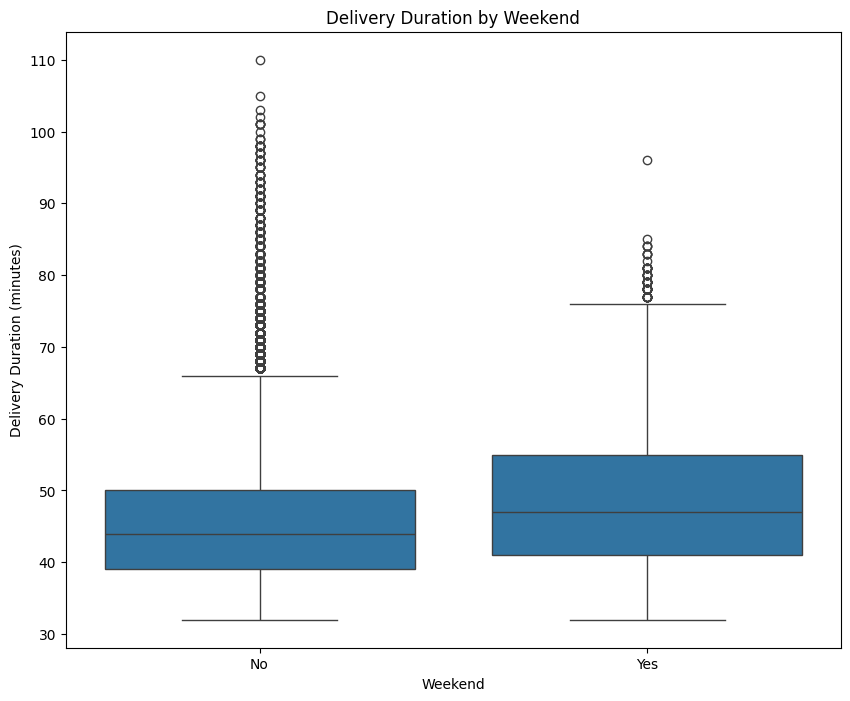

In [326]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='weekend', y='delivery_duration_min', data=data)
plt.title('Delivery Duration by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Delivery Duration (minutes)')

In [327]:
print(data.columns)

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration_min',
       'weekend'],
      dtype='object')


In [328]:
data['market_id'].unique()

array([1, 2, 3, 4, 5, 6])

In [329]:
data['order_protocol'].unique()

array([1, 2, 3, 5, 4, 6, 7])

In [330]:
## Here we found two more categocal varible and the varibles are 1.market_id and 2.order_protocol
## Now we will see the relation between the categorial data with our depent varibale (delivery_duration_min)

Text(0, 0.5, 'Delivery Duration in minutes')

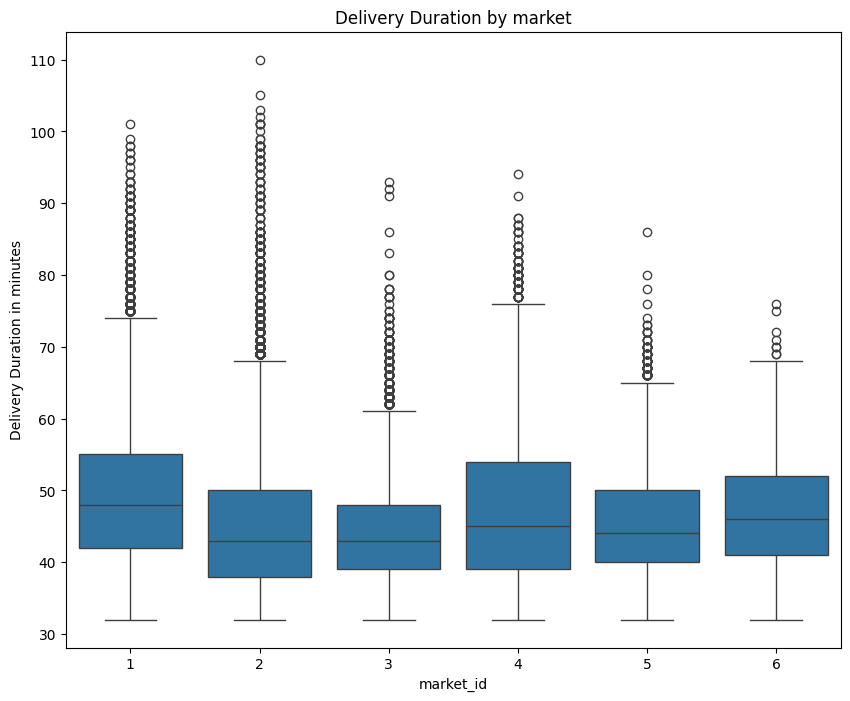

In [331]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='market_id', y='delivery_duration_min', data=data)
plt.title('Delivery Duration by market')
plt.xlabel('market_id')
plt.ylabel('Delivery Duration in minutes')

Text(0, 0.5, 'Delivery Duration (minutes)')

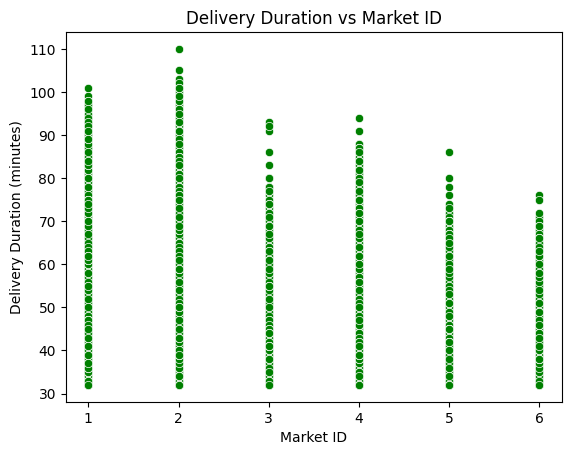

In [332]:
sns.scatterplot(x='market_id', y='delivery_duration_min', data=data, color='green')
plt.title('Delivery Duration vs Market ID')
plt.xlabel('Market ID')
plt.ylabel('Delivery Duration (minutes)')

Text(0, 0.5, 'Delivery Duration (minutes)')

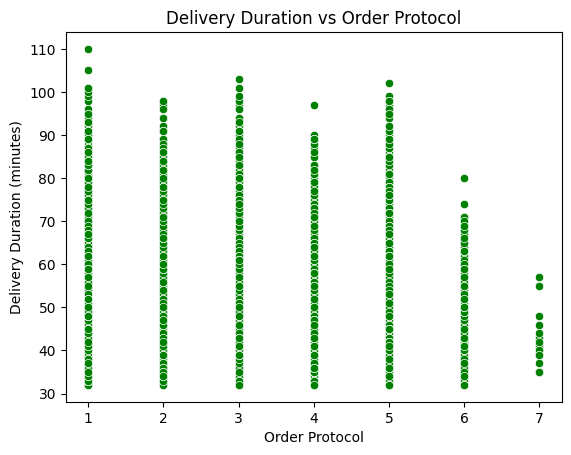

In [333]:
sns.scatterplot(x='order_protocol', y='delivery_duration_min', data=data, color='green')
plt.title('Delivery Duration vs Order Protocol')
plt.xlabel('Order Protocol')
plt.ylabel('Delivery Duration (minutes)')

In [334]:
print(data.columns)

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration_min',
       'weekend'],
      dtype='object')


In [335]:
## Now we show some relation between  the nummerial veriable and 'delivery_duration_min'

Text(0, 0.5, 'Delivery Duration (minutes)')

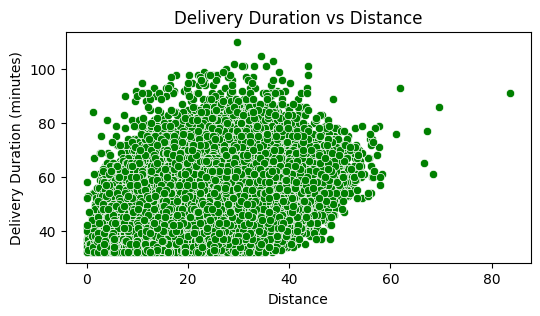

In [336]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='distance', y='delivery_duration_min', data=data, color='green')
plt.title('Delivery Duration vs Distance')
plt.xlabel('Distance')
plt.ylabel('Delivery Duration (minutes)')

Text(0, 0.5, 'Delivery Duration (minutes)')

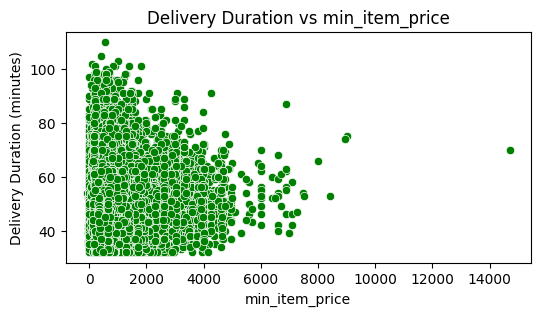

In [337]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='min_item_price', y='delivery_duration_min', data=data, color='green')
plt.title('Delivery Duration vs min_item_price')
plt.xlabel('min_item_price')
plt.ylabel('Delivery Duration (minutes)')

In [338]:
num_vars = ['store_primary_category','total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration_min']


In [339]:
corr_matrix = data[num_vars].corr()

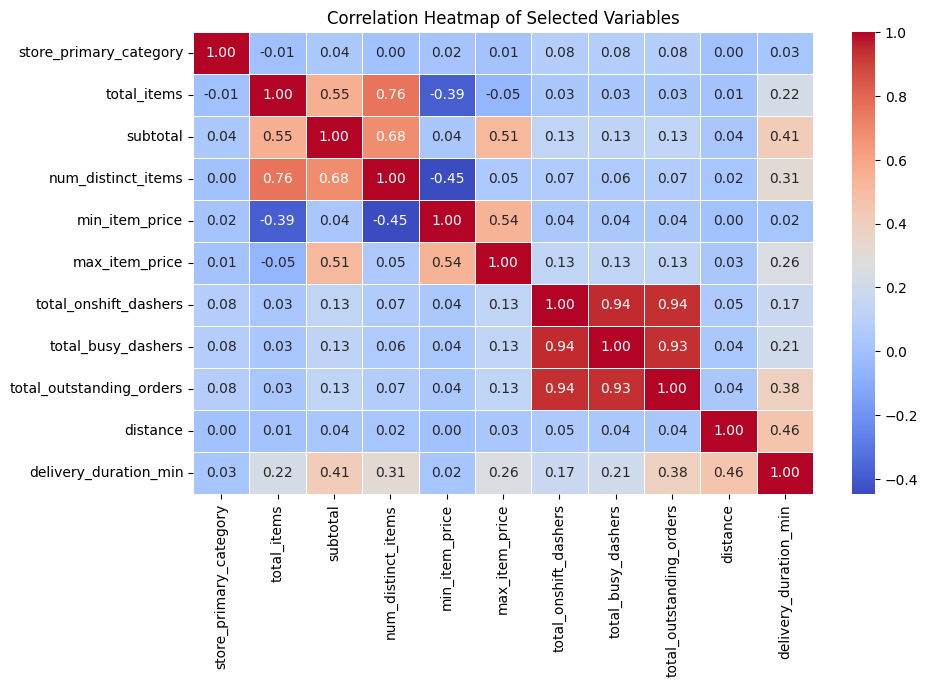

In [340]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Variables")
plt.show()

In [341]:
## Now we work on on the categorical verible
## Weekend data is contain Yes and No type data we will convert it to (Yes to 1) and (No to 1)

In [342]:
data['weekend'] = data['weekend'].str.strip().str.lower().map({'yes': 1, 'no': 0})

In [343]:
data['weekend'].unique()

array([0, 1])

In [344]:
## will create the dummy vaiable for the both the 'market_id' and 'order_protocol'

In [345]:
data = pd.get_dummies(
    data,
    columns=['market_id', 'order_protocol'],
    prefix=['market', 'protocol'],
    drop_first=True
)

In [346]:
data.head(2)

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,...,market_3,market_4,market_5,market_6,protocol_2,protocol_3,protocol_4,protocol_5,protocol_6,protocol_7
0,4,4,3441,4,557,1239,33,14,21,34.44,...,False,False,False,False,False,False,False,False,False,False
1,46,1,1900,1,1400,1400,1,2,2,27.60,...,False,False,False,False,True,False,False,False,False,False


In [347]:
## We will convert the Bool data into int of the dummy varible.
data = data.astype({col: 'int' for col in data.select_dtypes(include='bool').columns})

In [348]:
data.head(2)

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,...,market_3,market_4,market_5,market_6,protocol_2,protocol_3,protocol_4,protocol_5,protocol_6,protocol_7
0,4,4,3441,4,557,1239,33,14,21,34.44,...,0,0,0,0,0,0,0,0,0,0
1,46,1,1900,1,1400,1400,1,2,2,27.60,...,0,0,0,0,1,0,0,0,0,0


In [349]:
## Now we go forward for the train test split

In [350]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from  statsmodels.stats.outliers_influence import variance_inflation_factor

In [351]:
## Now spliting into train and test
## the split we are doing here (70: 30)

In [352]:
data_train,data_test=train_test_split(data,train_size=0.7,random_state=100)

In [353]:
print(data_train.shape)

(123043, 23)


In [354]:
print(data_test.shape)

(52734, 23)


In [355]:
## Rescalling the Features
## We will do Min-Max scaling

In [356]:
scaler= MinMaxScaler()

In [357]:
## Now We will fit the data
## create a list of numeric vars

In [358]:
num_vars = ['store_primary_category','total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration_min']

In [359]:
## We will fit the data
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [360]:
data_train.head()

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,...,market_3,market_4,market_5,market_6,protocol_2,protocol_3,protocol_4,protocol_5,protocol_6,protocol_7
94746,0.333333,0.002439,0.066791,0.052632,0.057416,0.067687,0.074713,0.082278,0.072664,0.215996,...,0,1,0,0,0,0,0,1,0,0
173338,1.000000,0.000000,0.031530,0.000000,0.057416,0.054082,0.787356,0.506329,0.491349,0.290709,...,0,1,0,0,0,0,0,1,0,0
37592,0.763889,0.000000,0.070896,0.000000,0.084870,0.081633,0.137931,0.158228,0.117647,0.338123,...,0,1,0,0,0,0,0,1,0,0
42763,0.388889,0.012195,0.017276,0.105263,0.003525,0.020340,0.580460,0.575949,0.467128,0.166188,...,0,0,0,0,0,0,1,0,0,0
27506,1.000000,0.004878,0.130597,0.105263,0.044197,0.081633,0.057471,0.107595,0.079585,0.095785,...,0,0,0,0,0,0,0,0,0,0


In [361]:
data_train.describe()

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,...,market_3,market_4,market_5,market_6,protocol_2,protocol_3,protocol_4,protocol_5,protocol_6,protocol_7
count,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,...,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000
mean,0.499179,0.005381,0.100667,0.088155,0.049945,0.078941,0.275754,0.290375,0.222411,0.261376,...,0.120039,0.263753,0.097259,0.003608,0.118893,0.268743,0.097494,0.236178,0.003714,0.000106
std,0.288032,0.006695,0.068296,0.085555,0.035299,0.038296,0.198671,0.203479,0.182317,0.104945,...,0.325009,0.440669,0.296311,0.059963,0.323664,0.443308,0.296631,0.424734,0.060831,0.010278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.002439,0.052873,0.052632,0.023793,0.054354,0.114943,0.120253,0.079585,0.183429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.527778,0.004878,0.082836,0.052632,0.043858,0.074490,0.229885,0.246835,0.162630,0.260536,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.763889,0.007317,0.127052,0.105263,0.067381,0.094898,0.396552,0.424051,0.314879,0.336686,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [362]:
## we will plot a heatmap

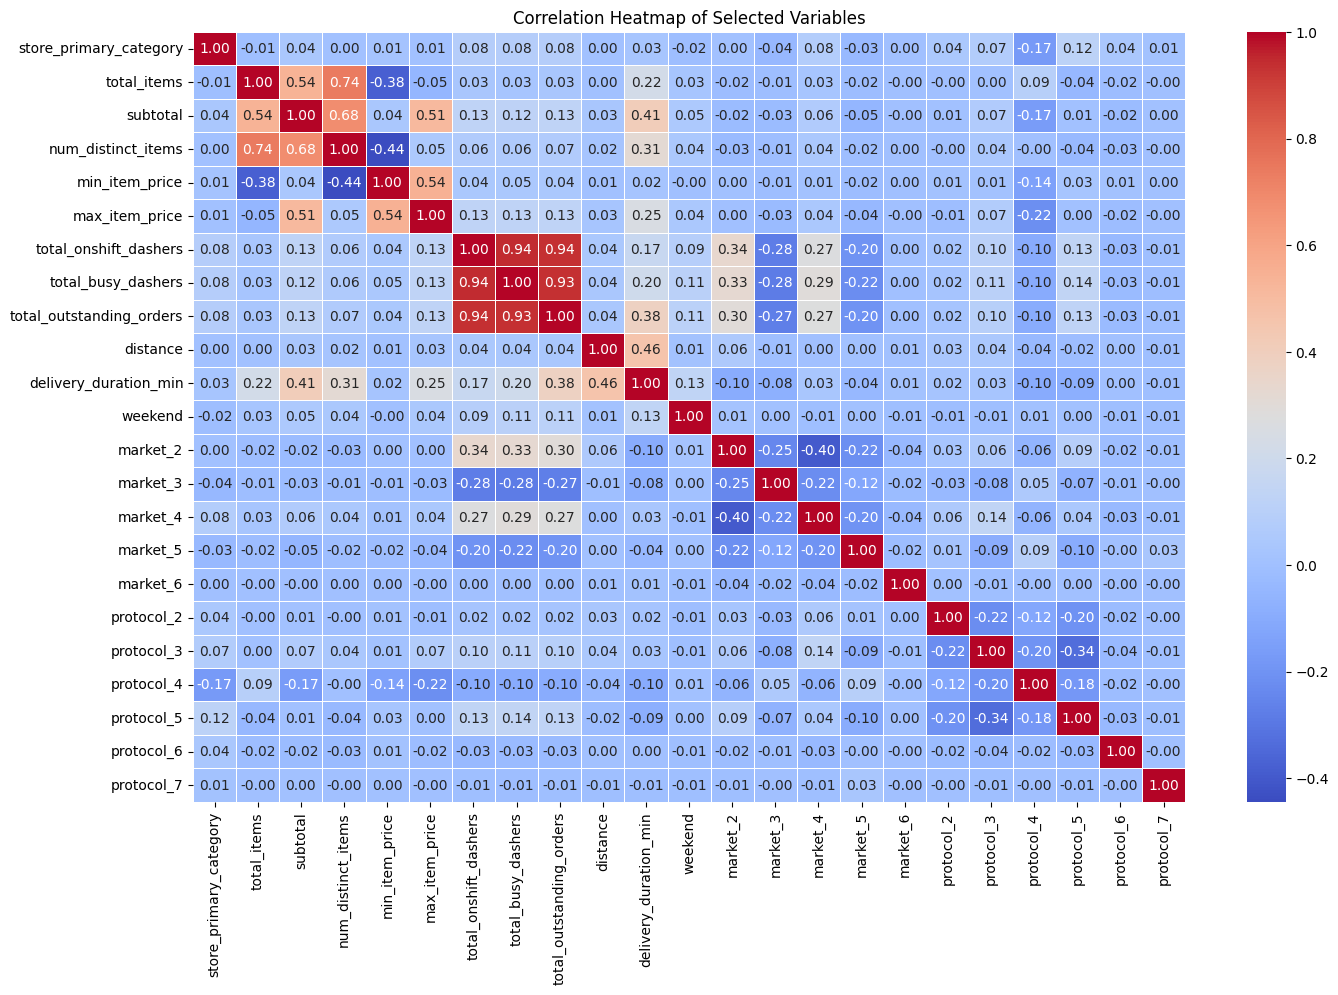

In [363]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Variables")
plt.show()

In [364]:
## From the above heatmap we found that distance>subtotal>total_outstanding_orders>num_distinct_items.

In [365]:
## Now we will fix X and y
## X_train,y_train

In [366]:
y_train=data_train.pop('delivery_duration_min')

In [367]:
X_train= data_train

In [368]:
## Now we will find to parameter for distance columne
## We do this just for testing

In [369]:
X1_train_sm=sm.add_constant(X_train['distance'])

In [370]:
## create fristmodel
lr=sm.OLS(y_train,X1_train_sm)

In [371]:
## fit the model
lr_model=lr.fit()

In [372]:
## we will find the parameter of the above varaible
lr_model.params

,0
const,0.049405
distance,0.575767


In [373]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_duration_min   R-squared:                       0.211
Model:                               OLS   Adj. R-squared:                  0.211
Method:                    Least Squares   F-statistic:                 3.297e+04
Date:                   Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                           16:13:19   Log-Likelihood:                 89696.
No. Observations:                 123043   AIC:                        -1.794e+05
Df Residuals:                     123041   BIC:                        -1.794e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0494      0.001     55.318      0.000       0.048       0.051
distance       0.5758      0.003    181.578      0.000       0.570       0.582
==============================================================================
Omnibus:                    15005.725   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23781.191
Skew:                           0.868   Prob(JB):                         0.00
Kurtosis:                       4.274   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
## We just done the above process just for check purpose.
## Now we will add the varibale in the model

In [375]:
## build a model with all variable.

In [376]:
X_train_lm=sm.add_constant(X_train)

In [377]:
lr=sm.OLS(y_train,X_train_lm)

In [378]:
lr_model=lr.fit()

In [379]:
lr_model.params

,0
const,0.026601
store_primary_category,0.006208
total_items,-0.226602
subtotal,0.474151
num_distinct_items,0.171211
min_item_price,0.039115
max_item_price,0.197524
total_onshift_dashers,-0.779329
total_busy_dashers,-0.296912
total_outstanding_orders,1.402740


In [380]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_duration_min   R-squared:                       0.870
Model:                               OLS   Adj. R-squared:                  0.870
Method:                    Least Squares   F-statistic:                 3.741e+04
Date:                   Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                           16:13:22   Log-Likelihood:             2.0059e+05
No. Observations:                 123043   AIC:                        -4.011e+05
Df Residuals:                     123020   BIC:                        -4.009e+05
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0266      0.001     40.583      0.000       0.025       0.028
store_primary_category       0.0062      0.000     12.835      0.000       0.005       0.007
total_items                 -0.2266      0.031     -7.236      0.000      -0.288      -0.165
subtotal                     0.4742      0.004    125.694      0.000       0.467       0.482
num_distinct_items           0.1712      0.003     54.302      0.000       0.165       0.177
min_item_price               0.0391      0.006      6.954      0.000       0.028       0.050
max_item_price               0.1975      0.005     36.769      0.000       0.187       0.208
total_onshift_dashers       -0.7793      0.002   -330.287      0.000      -0.784      -0.775
total_busy_dashers          -0.2969      0.002   -131.568      0.000      -0.301      -0.292
total_outstanding_orders     1.4027      0.002    598.706      0.000       1.398       1.407
distance                     0.5742      0.001    443.702      0.000       0.572       0.577
weekend                      0.0126      0.000     43.811      0.000       0.012       0.013
market_2                    -0.0802      0.000   -185.184      0.000      -0.081      -0.079
market_3                    -0.0586      0.000   -119.018      0.000      -0.060      -0.058
market_4                    -0.0674      0.000   -152.349      0.000      -0.068      -0.067
market_5                    -0.0502      0.001    -94.749      0.000      -0.051      -0.049
market_6                    -0.0442      0.002    -19.469      0.000      -0.049      -0.040
protocol_2                  -0.0132      0.000    -27.478      0.000      -0.014      -0.012
protocol_3                  -0.0219      0.000    -57.054      0.000      -0.023      -0.021
protocol_4                  -0.0273      0.001    -51.972      0.000      -0.028      -0.026
protocol_5                  -0.0410      0.000   -103.470      0.000      -0.042      -0.040
protocol_6                  -0.0206      0.002     -9.181      0.000      -0.025      -0.016
protocol_7                  -0.0285      0.013     -2.165      0.030      -0.054      -0.003
==============================================================================
Omnibus:                    30257.149   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107763.298
Skew:                           1.214   Prob(JB):                         0.00
Kurtosis:                       6.889   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
## Now we do Variance Inflation Factor(VIF) in this datasheet.

In [382]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,total_onshift_dashers,35.20
7,total_busy_dashers,34.77
8,total_outstanding_orders,24.70
5,max_item_price,11.37
2,subtotal,11.31
3,num_distinct_items,7.84
4,min_item_price,6.09
9,distance,5.62
1,total_items,3.93
0,store_primary_category,3.76


In [383]:
## since the varible is 'total_onshift_dashers' is very high
## We will drop that varible.

In [384]:
X_train=X_train.drop(['total_onshift_dashers'],axis=1)

In [385]:
X_train_lm=sm.add_constant(X_train)

In [386]:
lr=sm.OLS(y_train,X_train_lm)

In [387]:
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_duration_min   R-squared:                       0.755
Model:                               OLS   Adj. R-squared:                  0.755
Method:                    Least Squares   F-statistic:                 1.802e+04
Date:                   Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                           16:13:48   Log-Likelihood:             1.6153e+05
No. Observations:                 123043   AIC:                        -3.230e+05
Df Residuals:                     123021   BIC:                        -3.228e+05
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0224      0.001     24.830      0.000       0.021       0.024
store_primary_category       0.0058      0.001      8.670      0.000       0.004       0.007
total_items                 -0.1462      0.043     -3.400      0.001      -0.231      -0.062
subtotal                     0.4612      0.005     89.013      0.000       0.451       0.471
num_distinct_items           0.1628      0.004     37.594      0.000       0.154       0.171
min_item_price               0.0426      0.008      5.516      0.000       0.027       0.058
max_item_price               0.1742      0.007     23.605      0.000       0.160       0.189
total_busy_dashers          -0.6935      0.003   -264.257      0.000      -0.699      -0.688
total_outstanding_orders     1.0384      0.003    365.734      0.000       1.033       1.044
distance                     0.5722      0.002    321.929      0.000       0.569       0.576
weekend                      0.0182      0.000     46.247      0.000       0.017       0.019
market_2                    -0.1013      0.001   -172.097      0.000      -0.102      -0.100
market_3                    -0.0642      0.001    -95.116      0.000      -0.066      -0.063
market_4                    -0.0795      0.001   -131.222      0.000      -0.081      -0.078
market_5                    -0.0632      0.001    -87.070      0.000      -0.065      -0.062
market_6                    -0.0558      0.003    -17.891      0.000      -0.062      -0.050
protocol_2                  -0.0129      0.001    -19.523      0.000      -0.014      -0.012
protocol_3                  -0.0227      0.001    -43.100      0.000      -0.024      -0.022
protocol_4                  -0.0278      0.001    -38.532      0.000      -0.029      -0.026
protocol_5                  -0.0433      0.001    -79.632      0.000      -0.044      -0.042
protocol_6                  -0.0203      0.003     -6.610      0.000      -0.026      -0.014
protocol_7                  -0.0260      0.018     -1.441      0.150      -0.061       0.009
==============================================================================
Omnibus:                    13004.802   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36611.743
Skew:                           0.585   Prob(JB):                         0.00
Kurtosis:                       5.402   Cond. No.                         329.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [388]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,total_busy_dashers,24.78
7,total_outstanding_orders,19.23
5,max_item_price,11.37
2,subtotal,11.31
3,num_distinct_items,7.84
4,min_item_price,6.09
8,distance,5.62
1,total_items,3.93
0,store_primary_category,3.76
10,market_2,2.94


In [389]:
## same way we drop the total_busy_dashers

In [390]:
X_train=X_train.drop(['total_busy_dashers'],axis=1)

In [391]:
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_lm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_duration_min   R-squared:                       0.615
Model:                               OLS   Adj. R-squared:                  0.615
Method:                    Least Squares   F-statistic:                     9841.
Date:                   Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                           16:13:58   Log-Likelihood:             1.3387e+05
No. Observations:                 123043   AIC:                        -2.677e+05
Df Residuals:                     123022   BIC:                        -2.675e+05
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0060      0.001     -5.351      0.000      -0.008      -0.004
store_primary_category       0.0056      0.001      6.721      0.000       0.004       0.007
total_items                 -0.1016      0.054     -1.887      0.059      -0.207       0.004
subtotal                     0.4469      0.006     68.898      0.000       0.434       0.460
num_distinct_items           0.1704      0.005     31.429      0.000       0.160       0.181
min_item_price               0.0443      0.010      4.581      0.000       0.025       0.063
max_item_price               0.1399      0.009     15.150      0.000       0.122       0.158
total_outstanding_orders     0.3614      0.002    235.832      0.000       0.358       0.364
distance                     0.5688      0.002    255.583      0.000       0.564       0.573
weekend                      0.0161      0.000     32.563      0.000       0.015       0.017
market_2                    -0.1295      0.001   -178.735      0.000      -0.131      -0.128
market_3                    -0.0620      0.001    -73.298      0.000      -0.064      -0.060
market_4                    -0.1049      0.001   -140.068      0.000      -0.106      -0.103
market_5                    -0.0582      0.001    -64.006      0.000      -0.060      -0.056
market_6                    -0.0711      0.004    -18.214      0.000      -0.079      -0.063
protocol_2                  -0.0145      0.001    -17.521      0.000      -0.016      -0.013
protocol_3                  -0.0266      0.001    -40.263      0.000      -0.028      -0.025
protocol_4                  -0.0302      0.001    -33.406      0.000      -0.032      -0.028
protocol_5                  -0.0498      0.001    -73.157      0.000      -0.051      -0.048
protocol_6                  -0.0195      0.004     -5.070      0.000      -0.027      -0.012
protocol_7                  -0.0148      0.023     -0.656      0.512      -0.059       0.030
==============================================================================
Omnibus:                    13978.065   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35819.901
Skew:                           0.655   Prob(JB):                         0.00
Kurtosis:                       5.296   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [392]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,max_item_price,11.34
2,subtotal,11.31
3,num_distinct_items,7.84
4,min_item_price,6.09
7,distance,5.59
1,total_items,3.93
0,store_primary_category,3.75
6,total_outstanding_orders,3.58
9,market_2,2.81
11,market_4,2.63


In [393]:
## Now we have found that protocol_7	has high p- value we will drop that.

In [394]:
X_train=X_train.drop(['protocol_7'],axis=1)

In [395]:
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_lm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_duration_min   R-squared:                       0.615
Model:                               OLS   Adj. R-squared:                  0.615
Method:                    Least Squares   F-statistic:                 1.036e+04
Date:                   Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                           16:14:07   Log-Likelihood:             1.3387e+05
No. Observations:                 123043   AIC:                        -2.677e+05
Df Residuals:                     123023   BIC:                        -2.675e+05
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0060      0.001     -5.356      0.000      -0.008      -0.004
store_primary_category       0.0056      0.001      6.716      0.000       0.004       0.007
total_items                 -0.1016      0.054     -1.886      0.059      -0.207       0.004
subtotal                     0.4469      0.006     68.895      0.000       0.434       0.460
num_distinct_items           0.1704      0.005     31.431      0.000       0.160       0.181
min_item_price               0.0443      0.010      4.578      0.000       0.025       0.063
max_item_price               0.1400      0.009     15.157      0.000       0.122       0.158
total_outstanding_orders     0.3614      0.002    235.835      0.000       0.358       0.364
distance                     0.5688      0.002    255.594      0.000       0.564       0.573
weekend                      0.0161      0.000     32.567      0.000       0.015       0.017
market_2                    -0.1295      0.001   -178.739      0.000      -0.131      -0.128
market_3                    -0.0620      0.001    -73.298      0.000      -0.064      -0.060
market_4                    -0.1049      0.001   -140.071      0.000      -0.106      -0.103
market_5                    -0.0582      0.001    -64.048      0.000      -0.060      -0.056
market_6                    -0.0711      0.004    -18.214      0.000      -0.079      -0.063
protocol_2                  -0.0145      0.001    -17.515      0.000      -0.016      -0.013
protocol_3                  -0.0265      0.001    -40.258      0.000      -0.028      -0.025
protocol_4                  -0.0302      0.001    -33.401      0.000      -0.032      -0.028
protocol_5                  -0.0498      0.001    -73.155      0.000      -0.051      -0.048
protocol_6                  -0.0195      0.004     -5.068      0.000      -0.027      -0.012
==============================================================================
Omnibus:                    13978.124   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35819.306
Skew:                           0.655   Prob(JB):                         0.00
Kurtosis:                       5.296   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [396]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,max_item_price,11.34
2,subtotal,11.31
3,num_distinct_items,7.84
4,min_item_price,6.09
7,distance,5.59
1,total_items,3.93
0,store_primary_category,3.75
6,total_outstanding_orders,3.58
9,market_2,2.81
11,market_4,2.63


In [397]:
## Still we are having high Vif value we should drop max_item_price as well

In [398]:
X_train=X_train.drop(['max_item_price'],axis=1)
X_train_lm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_lm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_duration_min   R-squared:                       0.615
Model:                               OLS   Adj. R-squared:                  0.615
Method:                    Least Squares   F-statistic:                 1.090e+04
Date:                   Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                           16:14:13   Log-Likelihood:             1.3376e+05
No. Observations:                 123043   AIC:                        -2.675e+05
Df Residuals:                     123024   BIC:                        -2.673e+05
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0016      0.001     -1.470      0.141      -0.004       0.001
store_primary_category       0.0050      0.001      6.032      0.000       0.003       0.007
total_items                 -0.2514      0.053     -4.744      0.000      -0.355      -0.147
subtotal                     0.4956      0.006     87.842      0.000       0.485       0.507
num_distinct_items           0.1669      0.005     30.789      0.000       0.156       0.178
min_item_price               0.1074      0.009     12.283      0.000       0.090       0.124
total_outstanding_orders     0.3628      0.002    236.911      0.000       0.360       0.366
distance                     0.5690      0.002    255.439      0.000       0.565       0.573
weekend                      0.0163      0.000     32.899      0.000       0.015       0.017
market_2                    -0.1296      0.001   -178.699      0.000      -0.131      -0.128
market_3                    -0.0621      0.001    -73.372      0.000      -0.064      -0.060
market_4                    -0.1050      0.001   -140.061      0.000      -0.106      -0.104
market_5                    -0.0582      0.001    -63.974      0.000      -0.060      -0.056
market_6                    -0.0715      0.004    -18.282      0.000      -0.079      -0.064
protocol_2                  -0.0151      0.001    -18.298      0.000      -0.017      -0.013
protocol_3                  -0.0267      0.001    -40.409      0.000      -0.028      -0.025
protocol_4                  -0.0312      0.001    -34.590      0.000      -0.033      -0.029
protocol_5                  -0.0504      0.001    -74.045      0.000      -0.052      -0.049
protocol_6                  -0.0211      0.004     -5.472      0.000      -0.029      -0.014
==============================================================================
Omnibus:                    14043.288   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35868.844
Skew:                           0.658   Prob(JB):                         0.00
Kurtosis:                       5.294   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [399]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,subtotal,8.70
3,num_distinct_items,7.84
6,distance,5.46
4,min_item_price,4.39
1,total_items,3.82
0,store_primary_category,3.74
5,total_outstanding_orders,3.56
8,market_2,2.80
10,market_4,2.62
14,protocol_3,2.07


In [400]:
print(data.columns)

Index(['store_primary_category', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration_min',
       'weekend', 'market_2', 'market_3', 'market_4', 'market_5', 'market_6',
       'protocol_2', 'protocol_3', 'protocol_4', 'protocol_5', 'protocol_6',
       'protocol_7'],
      dtype='object')


In [401]:
## Residual analysis in train data

In [402]:
y_train_pred=lr_model.predict(X_train_lm)

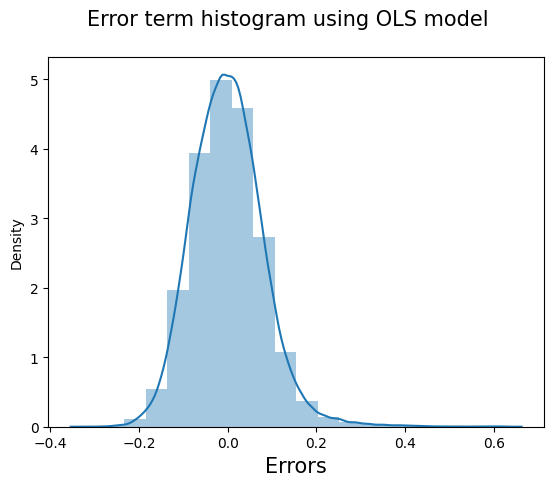

In [403]:
## plot the histogram of error term
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=20)
fig.suptitle('Error term histogram using OLS model',fontsize=15)
plt.xlabel('Errors',fontsize=15)
plt.show()

In [404]:
## Makeing prediction using the final data

In [405]:
num_var=['store_primary_category','total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration_min']

In [406]:
data_test[num_vars] = scaler.fit_transform(data_test[num_vars])

In [407]:
data_test.describe()

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,...,market_3,market_4,market_5,market_6,protocol_2,protocol_3,protocol_4,protocol_5,protocol_6,protocol_7
count,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,...,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000
mean,0.496728,0.037972,0.119794,0.093073,0.107645,0.136413,0.290314,0.298216,0.220349,0.353479,...,0.119562,0.261103,0.100334,0.003679,0.118728,0.266583,0.099556,0.234289,0.004191,0.000114
std,0.287561,0.043114,0.081085,0.090333,0.072272,0.065393,0.205288,0.205176,0.181539,0.140765,...,0.324452,0.439240,0.300447,0.060542,0.323471,0.442177,0.299410,0.423558,0.064602,0.010666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.236111,0.017241,0.062222,0.000000,0.053726,0.094000,0.125000,0.127389,0.079038,0.248869,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.527778,0.034483,0.098889,0.055556,0.095032,0.128824,0.244048,0.254777,0.161512,0.352941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.763889,0.051724,0.151778,0.111111,0.143874,0.164118,0.410714,0.426752,0.312715,0.455074,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [408]:
y_test=data_test.pop('delivery_duration_min')
X_test=data_test

In [409]:
## Add a constanat
X_test_sm=sm.add_constant(X_test)
X_test_sm.head(2)

,const,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,...,market_3,market_4,market_5,market_6,protocol_2,protocol_3,protocol_4,protocol_5,protocol_6,protocol_7
139667,1.0,0.625000,0.034483,0.057556,0.055556,0.032933,0.117059,0.375000,0.407643,0.230241,...,0,0,0,0,0,0,0,0,0,0
80077,1.0,0.055556,0.017241,0.131111,0.000000,0.182947,0.144118,0.130952,0.140127,0.075601,...,0,0,0,0,0,0,0,0,0,0


In [410]:
X_test_sm=X_test_sm.drop(['total_onshift_dashers','total_busy_dashers','protocol_7','max_item_price'],axis=1)
X_test_sm.head(2)

,const,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,total_outstanding_orders,distance,weekend,market_2,market_3,market_4,market_5,market_6,protocol_2,protocol_3,protocol_4,protocol_5,protocol_6
139667,1.0,0.625000,0.034483,0.057556,0.055556,0.032933,0.230241,0.332256,0,0,0,0,0,0,0,0,0,0,0
80077,1.0,0.055556,0.017241,0.131111,0.000000,0.182947,0.075601,0.207498,1,0,0,0,0,0,0,0,0,0,0


In [411]:
y_test_pred=lr_model.predict(X_test_sm)

In [412]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [413]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.12183273052890697

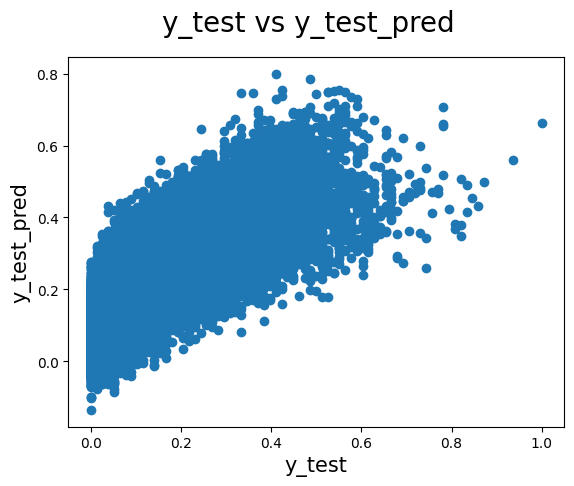

In [414]:
fig=plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.xlabel('y_test',fontsize=15)
plt.ylabel('y_test_pred',fontsize=15)
plt.show()

In [415]:
## We will do the RFE then we will go to the equation as well

In [416]:
## Import liberies

In [417]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [429]:
num_var1=['store_primary_category','total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance']

In [430]:
data_train.describe()

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,...,market_3,market_4,market_5,market_6,protocol_2,protocol_3,protocol_4,protocol_5,protocol_6,protocol_7
count,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,...,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000,123043.000000
mean,0.499179,0.005381,0.100667,0.088155,0.049945,0.078941,0.275754,0.290375,0.222411,0.261376,...,0.120039,0.263753,0.097259,0.003608,0.118893,0.268743,0.097494,0.236178,0.003714,0.000106
std,0.288032,0.006695,0.068296,0.085555,0.035299,0.038296,0.198671,0.203479,0.182317,0.104945,...,0.325009,0.440669,0.296311,0.059963,0.323664,0.443308,0.296631,0.424734,0.060831,0.010278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.002439,0.052873,0.052632,0.023793,0.054354,0.114943,0.120253,0.079585,0.183429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.527778,0.004878,0.082836,0.052632,0.043858,0.074490,0.229885,0.246835,0.162630,0.260536,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.763889,0.007317,0.127052,0.105263,0.067381,0.094898,0.396552,0.424051,0.314879,0.336686,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [452]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(estimator=lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('store_primary_category', np.False_, np.int64(8)),
 ('total_items', np.True_, np.int64(1)),
 ('subtotal', np.True_, np.int64(1)),
 ('num_distinct_items', np.True_, np.int64(1)),
 ('min_item_price', np.True_, np.int64(1)),
 ('max_item_price', np.True_, np.int64(1)),
 ('total_onshift_dashers', np.True_, np.int64(1)),
 ('total_busy_dashers', np.True_, np.int64(1)),
 ('total_outstanding_orders', np.True_, np.int64(1)),
 ('distance', np.True_, np.int64(1)),
 ('weekend', np.False_, np.int64(7)),
 ('market_2', np.True_, np.int64(1)),
 ('market_3', np.True_, np.int64(1)),
 ('market_4', np.True_, np.int64(1)),
 ('market_5', np.True_, np.int64(1)),
 ('market_6', np.True_, np.int64(1)),
 ('protocol_2', np.False_, np.int64(6)),
 ('protocol_3', np.False_, np.int64(4)),
 ('protocol_4', np.False_, np.int64(3)),
 ('protocol_5', np.True_, np.int64(1)),
 ('protocol_6', np.False_, np.int64(5)),
 ('protocol_7', np.False_, np.int64(2))]

In [453]:
col=X_train.columns[rfe.support_]
col

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_2', 'market_3',
       'market_4', 'market_5', 'market_6', 'protocol_5'],
      dtype='object')

In [443]:
X_train.columns[~rfe.support_]

Index(['store_primary_category', 'min_item_price', 'weekend', 'market_3',
       'market_5', 'market_6', 'protocol_2', 'protocol_3', 'protocol_4',
       'protocol_5', 'protocol_6', 'protocol_7'],
      dtype='object')

In [454]:
## The above are the list of the object that are support and non supported by the RFE

In [455]:
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)

In [456]:
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_duration_min   R-squared:                       0.863
Model:                               OLS   Adj. R-squared:                  0.863
Method:                    Least Squares   F-statistic:                 5.166e+04
Date:                   Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                           17:07:32   Log-Likelihood:             1.9738e+05
No. Observations:                 123043   AIC:                        -3.947e+05
Df Residuals:                     123027   BIC:                        -3.946e+05
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0189      0.001     32.033      0.000       0.018       0.020
total_items                 -0.3666      0.032    -11.519      0.000      -0.429      -0.304
subtotal                     0.4866      0.004    126.780      0.000       0.479       0.494
num_distinct_items           0.1757      0.003     54.329      0.000       0.169       0.182
min_item_price               0.0458      0.006      7.936      0.000       0.034       0.057
max_item_price               0.2188      0.005     39.879      0.000       0.208       0.230
total_onshift_dashers       -0.7863      0.002   -325.276      0.000      -0.791      -0.782
total_busy_dashers          -0.2948      0.002   -127.450      0.000      -0.299      -0.290
total_outstanding_orders     1.4116      0.002    588.127      0.000       1.407       1.416
distance                     0.5737      0.001    432.352      0.000       0.571       0.576
market_2                    -0.0830      0.000   -189.021      0.000      -0.084      -0.082
market_3                    -0.0574      0.001   -113.937      0.000      -0.058      -0.056
market_4                    -0.0716      0.000   -160.815      0.000      -0.072      -0.071
market_5                    -0.0495      0.001    -91.372      0.000      -0.051      -0.048
market_6                    -0.0456      0.002    -19.546      0.000      -0.050      -0.041
protocol_5                  -0.0268      0.000    -80.812      0.000      -0.027      -0.026
==============================================================================
Omnibus:                    26657.624   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79645.052
Skew:                           1.127   Prob(JB):                         0.00
Kurtosis:                       6.233   Cond. No.                         291.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [457]:
X_train_rfe=X_train_rfe.drop(['total_onshift_dashers'],axis=1)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_duration_min   R-squared:                       0.745
Model:                               OLS   Adj. R-squared:                  0.745
Method:                    Least Squares   F-statistic:                 2.570e+04
Date:                   Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                           17:07:40   Log-Likelihood:             1.5920e+05
No. Observations:                 123043   AIC:                        -3.184e+05
Df Residuals:                     123028   BIC:                        -3.182e+05
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0154      0.001     19.202      0.000       0.014       0.017
total_items                 -0.2839      0.043     -6.542      0.000      -0.369      -0.199
subtotal                     0.4730      0.005     90.374      0.000       0.463       0.483
num_distinct_items           0.1684      0.004     38.176      0.000       0.160       0.177
min_item_price               0.0493      0.008      6.266      0.000       0.034       0.065
max_item_price               0.1978      0.007     26.433      0.000       0.183       0.212
total_busy_dashers          -0.6944      0.003   -259.769      0.000      -0.700      -0.689
total_outstanding_orders     1.0455      0.003    361.618      0.000       1.040       1.051
distance                     0.5718      0.002    316.019      0.000       0.568       0.575
market_2                    -0.1046      0.001   -176.729      0.000      -0.106      -0.103
market_3                    -0.0630      0.001    -91.636      0.000      -0.064      -0.062
market_4                    -0.0843      0.001   -139.406      0.000      -0.085      -0.083
market_5                    -0.0625      0.001    -84.709      0.000      -0.064      -0.061
market_6                    -0.0577      0.003    -18.149      0.000      -0.064      -0.051
protocol_5                  -0.0289      0.000    -63.894      0.000      -0.030      -0.028
==============================================================================
Omnibus:                    10636.292   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25813.534
Skew:                           0.525   Prob(JB):                         0.00
Kurtosis:                       4.984   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [458]:
X_train_rfe=X_train_rfe.drop(['total_busy_dashers'],axis=1)
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     delivery_duration_min   R-squared:                       0.605
Model:                               OLS   Adj. R-squared:                  0.605
Method:                    Least Squares   F-statistic:                 1.452e+04
Date:                   Tue, 15 Jul 2025   Prob (F-statistic):               0.00
Time:                           17:07:49   Log-Likelihood:             1.3230e+05
No. Observations:                 123043   AIC:                        -2.646e+05
Df Residuals:                     123029   BIC:                        -2.644e+05
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0152      0.001    -15.344      0.000      -0.017      -0.013
total_items                 -0.2429      0.054     -4.498      0.000      -0.349      -0.137
subtotal                     0.4587      0.007     70.427      0.000       0.446       0.471
num_distinct_items           0.1759      0.005     32.052      0.000       0.165       0.187
min_item_price               0.0527      0.010      5.381      0.000       0.033       0.072
max_item_price               0.1635      0.009     17.567      0.000       0.145       0.182
total_outstanding_orders     0.3666      0.002    238.283      0.000       0.364       0.370
distance                     0.5680      0.002    252.270      0.000       0.564       0.572
market_2                    -0.1333      0.001   -184.141      0.000      -0.135      -0.132
market_3                    -0.0607      0.001    -70.927      0.000      -0.062      -0.059
market_4                    -0.1103      0.001   -148.651      0.000      -0.112      -0.109
market_5                    -0.0573      0.001    -62.437      0.000      -0.059      -0.055
market_6                    -0.0730      0.004    -18.464      0.000      -0.081      -0.065
protocol_5                  -0.0334      0.001    -59.318      0.000      -0.034      -0.032
==============================================================================
Omnibus:                    11833.752   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27294.812
Skew:                           0.593   Prob(JB):                         0.00
Kurtosis:                       4.979   Cond. No.                         274.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [459]:
## Residual analyis

In [461]:
y1_train_pred=lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

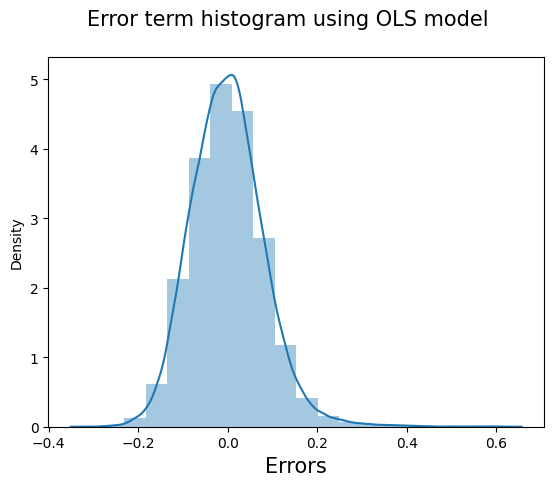

In [463]:
##Plot a histogrmaae of the error terms
fig=plt.figure()
sns.distplot((y_train-y1_train_pred),bins=20)
fig.suptitle('Error term histogram using OLS model',fontsize=15)
plt.xlabel('Errors',fontsize=15)

In [465]:
data_test.describe()

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,...,market_3,market_4,market_5,market_6,protocol_2,protocol_3,protocol_4,protocol_5,protocol_6,protocol_7
count,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,...,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000,52734.000000
mean,0.496728,0.037972,0.119794,0.093073,0.107645,0.136413,0.290314,0.298216,0.220349,0.353479,...,0.119562,0.261103,0.100334,0.003679,0.118728,0.266583,0.099556,0.234289,0.004191,0.000114
std,0.287561,0.043114,0.081085,0.090333,0.072272,0.065393,0.205288,0.205176,0.181539,0.140765,...,0.324452,0.439240,0.300447,0.060542,0.323471,0.442177,0.299410,0.423558,0.064602,0.010666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.236111,0.017241,0.062222,0.000000,0.053726,0.094000,0.125000,0.127389,0.079038,0.248869,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.527778,0.034483,0.098889,0.055556,0.095032,0.128824,0.244048,0.254777,0.161512,0.352941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.763889,0.051724,0.151778,0.111111,0.143874,0.164118,0.410714,0.426752,0.312715,0.455074,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [476]:
X2_test = data_test

In [481]:
X2_test_new=sm.add_constant(X2_test)
X2_test_new=X2_test_new[X_train_rfe.columns]

In [483]:
y2_test_pred=lm.predict(X2_test_new)

In [484]:
## Model Evaluation

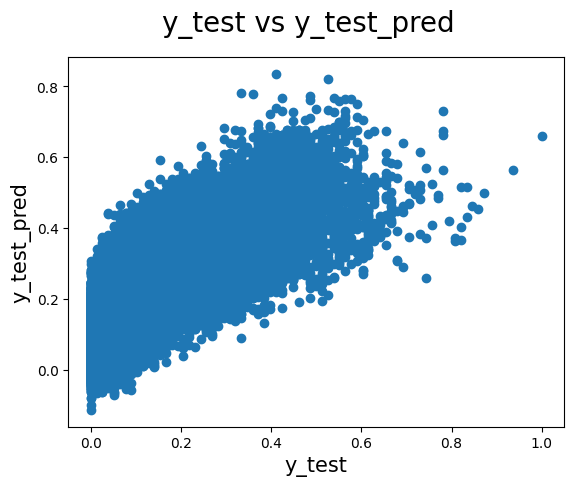

In [486]:
fig=plt.figure()
plt.scatter(y_test,y2_test_pred)
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.xlabel('y_test',fontsize=15)
plt.ylabel('y_test_pred',fontsize=15)
plt.show()

In [487]:
## Here are the qucation of the above model

In [488]:
##Delivery_time= 0.5688 *distance+0.4469*subtotal+0.3614*total_outstanding_time +0.1704 * num_distict_-items